# Correlation of Movies

Importing Necessary Librares

In [37]:
pip install wquantiles

In [2]:
#Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
import missingno as msno
plt.style.use('ggplot')
from matplotlib.pyplot import figure
'''pd.set_option ('display.max_columns', None)
pd.set_option('display.width', 1000)'''
pd.set_option("display.max_rows",None)
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles
import math
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

In [3]:
#Read csv file
df=pd.read_csv("/content/drive/MyDrive/Data_Analyst_Portfolio_Project/movies.csv")

In [4]:
def nunique_val(dataframe,col,head=5):
  print(col,dataframe[col].nunique())
  print(dataframe[col].head(),"\n\n\n")

In [ ]:
for col in df.columns:
  nunique_val(dataframe=df,col=col)

In [ ]:
# Scope of Project
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
#Problems i observe is that in released column format is wrong.Personally, i wanted to seperate country value from released column.

# Null Value Analysis

In [ ]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

<Axes: >

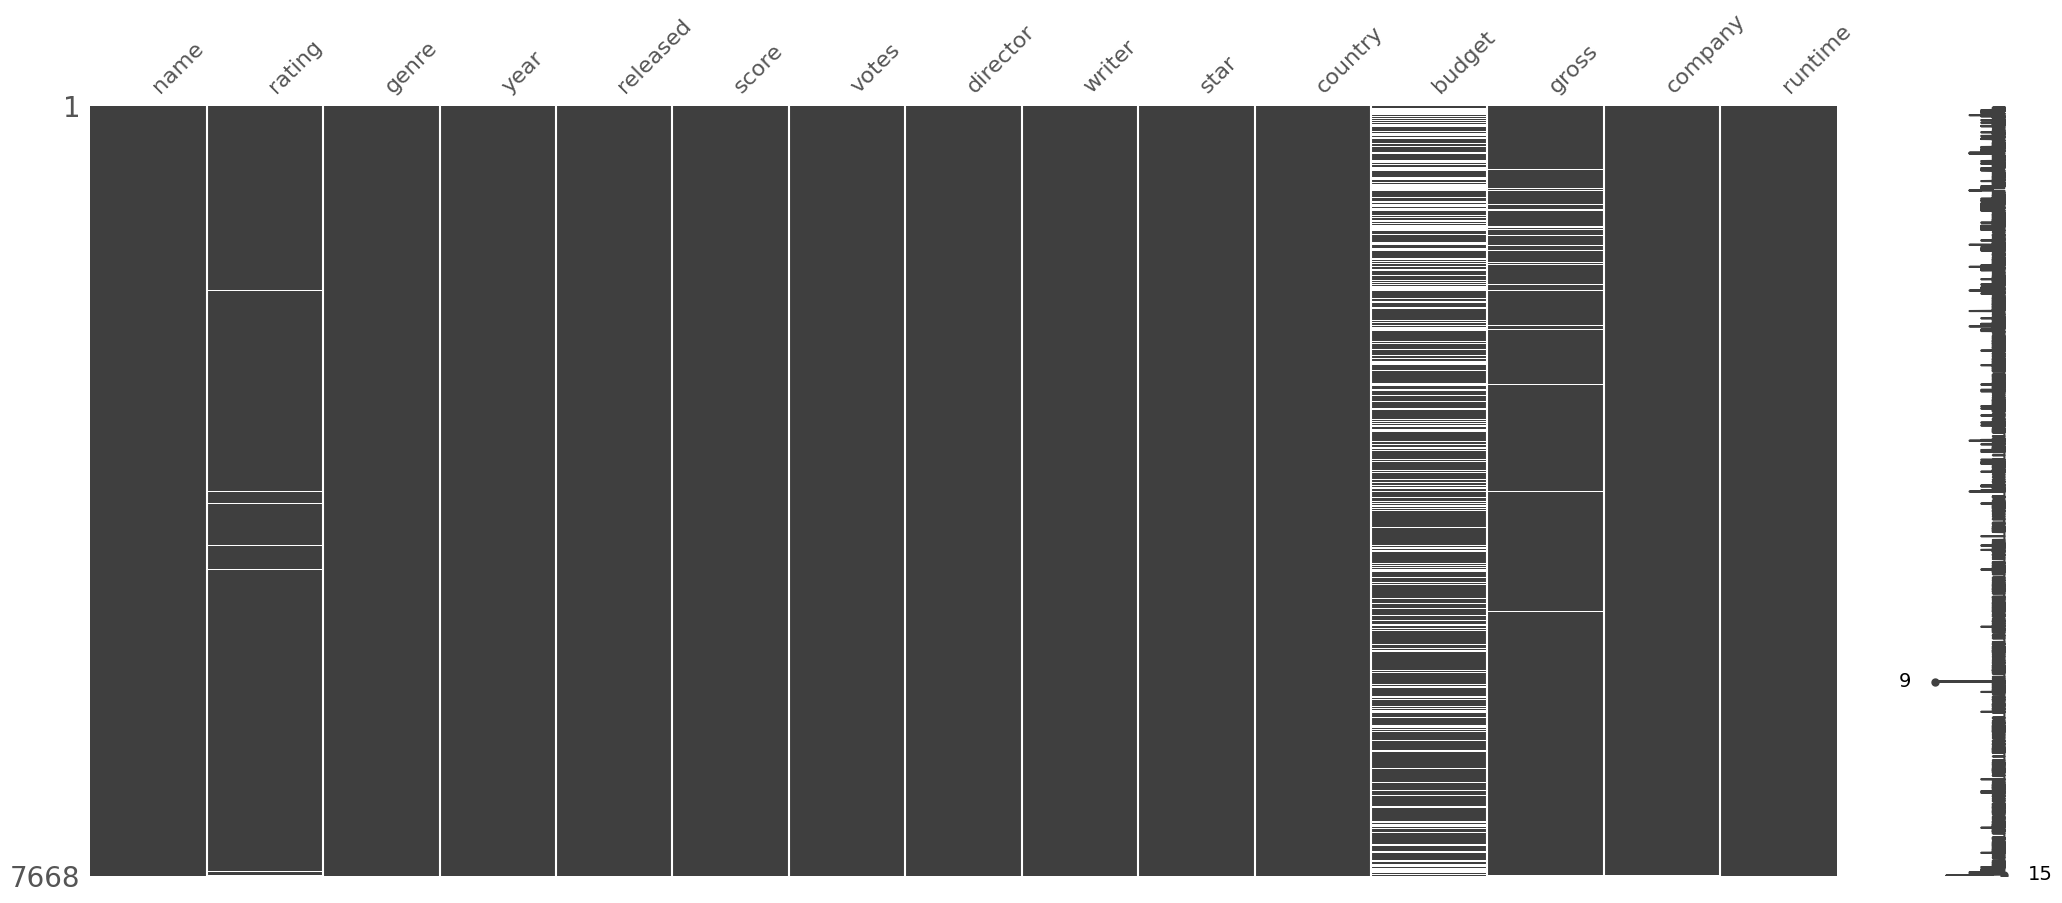

In [ ]:
#Visualization of Null Values
msno.matrix(df)

<Axes: >

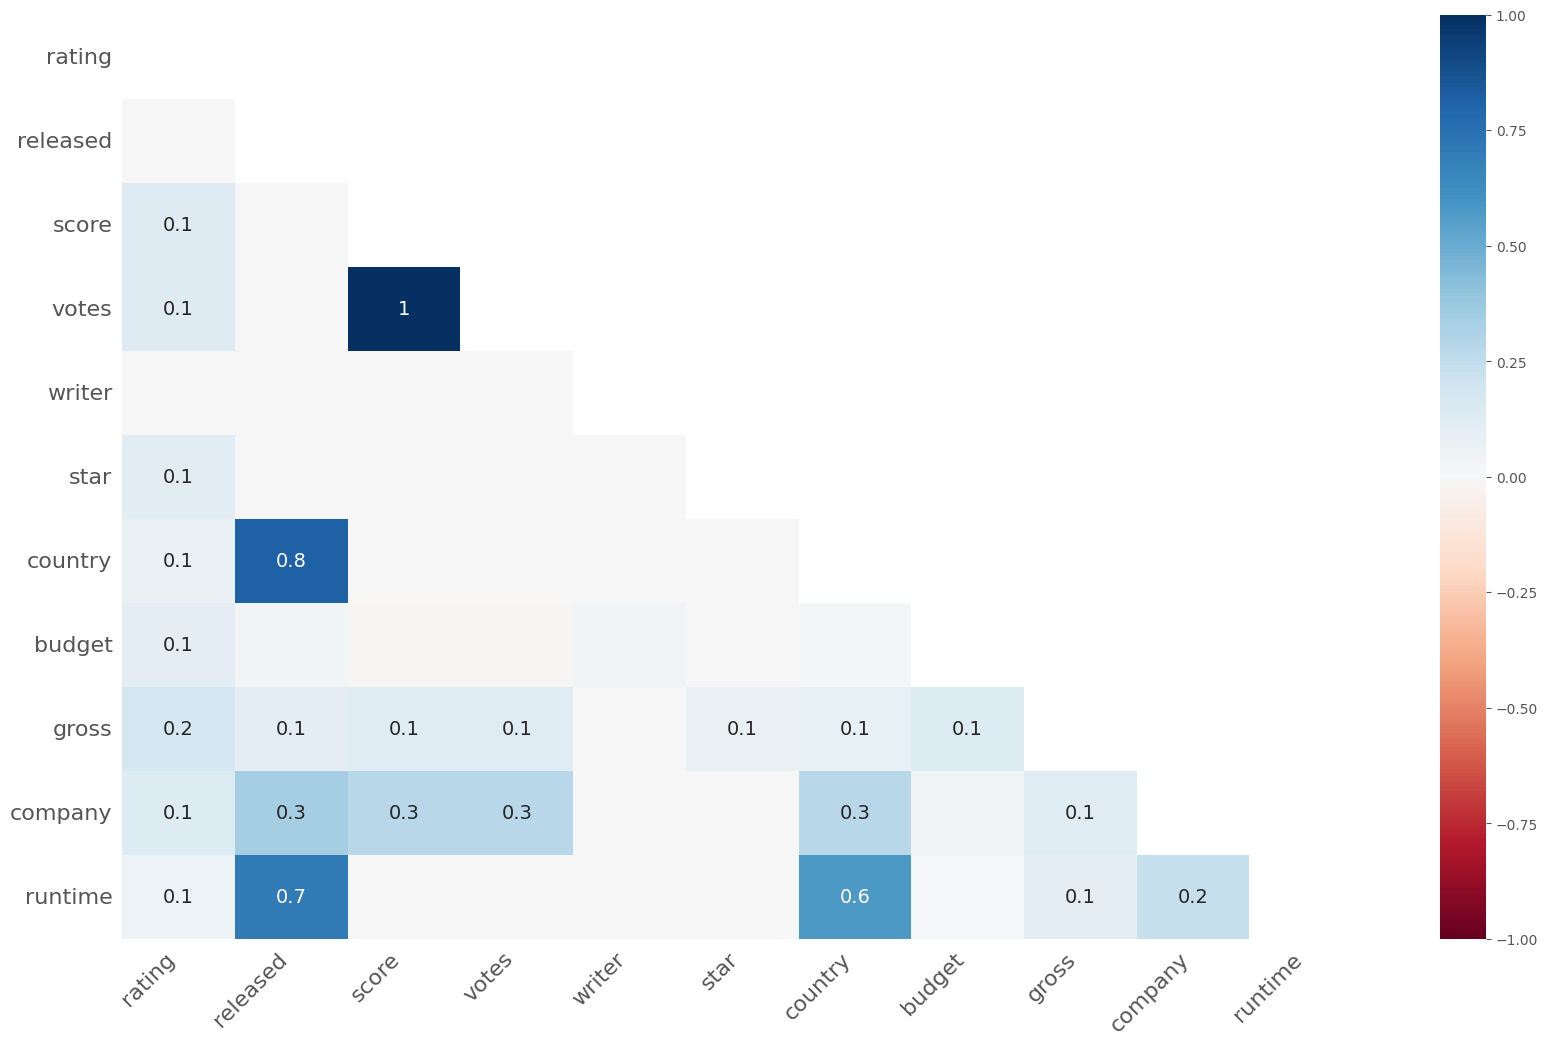

In [ ]:
#Null Correlation
msno.heatmap(df)

In [ ]:
#Relationship Between "genre","budget" and "rating" analyzed.
df.groupby(["genre","budget","rating"]).agg({"budget":"mean"})

budget
genre     budget      rating                
Action    7000.0      R               7000.0
          230000.0    R             230000.0
          350000.0    R             350000.0
          457000.0    R             457000.0
          475000.0    R             475000.0
          500000.0    R             500000.0
          700000.0    R             700000.0
          780000.0    PG-13         780000.0
          800000.0    R             800000.0
          900000.0    R             900000.0
          1000000.0   R            1000000.0
          1100000.0   R            1100000.0
          1200000.0   R            1200000.0
          1250000.0   R            1250000.0
          1300000.0   Not Rated    1300000.0
          1500000.0   R            1500000.0
          2000000.0   PG           2000000.0
                      PG-13        2000000.0
                      R            2000000.0
          2300000.0   R            2300000.0
          2410000.0   R            2410000.0
          2500000.0   R            2500000.0
          2550000.0   R            2550000.0
          2700000.0   PG-13        2700000.0
          2900000.0   R            2900000.0
          3000000.0   Not Rated    3000000.0
                      R            3000000.0
          3200000.0   R            3200000.0
          3401376.0   R            3401376.0
          3500000.0   PG-13        3500000.0
                      R            3500000.0
          3520000.0   R            3520000.0
          3700000.0   R            3700000.0
          3800000.0   R            3800000.0
          4000000.0   PG-13        4000000.0
                      R            4000000.0
          4200000.0   R            4200000.0
          4500000.0   R            4500000.0
          4600000.0   R            4600000.0
          4800000.0   R            4800000.0
          5000000.0   PG           5000000.0
                      PG-13        5000000.0
                      R            5000000.0
          5100000.0   R            5100000.0
          5200000.0   R            5200000.0
          5500000.0   R            5500000.0
          6000000.0   PG-13        6000000.0
                      R            6000000.0
          6400000.0   R            6400000.0
          6428966.0   R            6428966.0
          6500000.0   PG           6500000.0
                      R            6500000.0
          7000000.0   PG-13        7000000.0
                      R            7000000.0
          7300000.0   R            7300000.0
          7400000.0   R            7400000.0
          7500000.0   R            7500000.0
          7850000.0   PG-13        7850000.0
          8000000.0   PG           8000000.0
                      PG-13        8000000.0
                      R            8000000.0
          8500000.0   R            8500000.0
          8700000.0   R            8700000.0
          8800000.0   PG-13        8800000.0
          9000000.0   PG           9000000.0
                      PG-13        9000000.0
                      R            9000000.0
          10000000.0  PG          10000000.0
                      PG-13       10000000.0
                      R           10000000.0
          10500000.0  R           10500000.0
          11000000.0  PG-13       11000000.0
                      R           11000000.0
          11200000.0  PG          11200000.0
          11500000.0  R           11500000.0
          11987578.0  R           11987578.0
          12000000.0  PG          12000000.0
                      PG-13       12000000.0
                      R           12000000.0
          12500000.0  PG-13       12500000.0
          12800000.0  R           12800000.0
          13000000.0  PG          13000000.0
                      PG-13       13000000.0
                      R           13000000.0
          13500000.0  PG          13500000.0
                      R           13500000.0
          14000000.0  PG          14000000.0
                      PG-13      

# Categoric and Numeric Variable Analysis

In [5]:
#First upload my functions
def grab_col_names(dataframe,cat_th=10,car_th=30):
  """
  veri setinde numerik,kategorik ve kategoric ama kardinal değişkenlerin isimlerini verir.
  Parameters
  ----------
  dataframe:dataframe
    Değişken isimleri alınmak istenen Dataframe dir.

  cat_th:int,float
    numerik fakat kategorik olan değişkenler için eşik değeri

  car_th:int,float
    Kategorik fakat kardinal değişkenler için sınıf değeri

  Returns
  ----------
  cat_cols:Liste
    Kategorik değişken Listesi

  num_cols:Liste
    Numerik değişken listesi

  cat_but_car:Liste
    Kardinal değişken listesi

  Notes
  ----------
  cat_cols +num_cols +cat_cut_car = toplam değişken sayısı
  num_but_cat cat_cols un içerisinde.
  Return olan 3 liste toplan toplan degisken sayisina esittir: cat_cols + num_cols + cat_but_car

  """
  cat_cols=[col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"]]
  num_but_cat =[col for col in df.columns if (df[col].nunique() < cat_th) and (df[col].dtypes in ["int","float"])]
  cat_but_car=[col for col in df.columns if df[col].nunique()>car_th and str(df[col].dtypes) in ["category","object"]]
  cat_cols = cat_cols+num_but_cat
  cat_cols = [col for col in cat_cols if col not in cat_but_car]

  num_cols=[col for col in df.columns if str(df[col].dtype) in ["float64","int64"]]
  num_cols=[col for col in num_cols if col not in cat_cols]
  print(f"Observations: {dataframe. shape [0]}")
  print(f"Variables: {dataframe.shape[1]}")
  print(f' cat_cols: {len(cat_cols)} ')
  print(f' num_cols: {len(num_cols)}')
  print(f' cat_but_car: {len(cat_but_car)}')
  print(f' num_but_cat: {len(num_but_cat)}')
  return cat_cols,num_cols,cat_but_car

  cat_cols,num_cols,cat_but_car=grab_col_names(df,10,20)

In [6]:
def cat_summary(dataframe,col_name,plot=False):
  """Kategorik değişkenlerin miktarı ve yüzdesi ve grafiğinin görülmesi için bu yöntem tercih  edilir.
Parameters
--------
Dataframe:Pandas dataframe type
col_name:column name from relevant dataframe
plot:count plot from of column.Deffault value False.
--------
Return
print>>>Ratio of relevant category
if plot==True:
print>>countplot
-------
  """
  print(pd.DataFrame({col_name:dataframe[col_name].value_counts(),
                      "Ratio":100*dataframe[col_name].value_counts()/len(dataframe)}))
  print("*******************************")
  if plot:
    sns.countplot(x=dataframe[col_name],data=dataframe)
    plt.show(block=True)

In [7]:
def num_summary(dataframe,numerical_col,plot=False):
  """Numerik değişkenlerin çeyreklikleri, histogramı ve boxplotunun görülmesi için ideal bir araçtır.
  """
  print("********")
  quantiles = [0.05,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.80,0.90,0.99]
  print(dataframe[numerical_col].describe(quantiles).T)
  if plot:
    sns.histplot(data=df,x=df[col])
    plt.show()
    sns.boxplot(data=df,x=df[col])
    plt.show()

In [8]:
#Definin variables whether numeric,categoric or cardinal
cat_cols,num_cols,cat_but_car=grab_col_names(df,42,2386)

Observations: 7668
Variables: 15
 cat_cols: 5 
 num_cols: 5
 cat_but_car: 5
 num_but_cat: 1


In [9]:
#Checking Variables
df[cat_cols].head()

,rating,genre,country,company,year
0,R,Drama,United Kingdom,Warner Bros.,1980
1,R,Adventure,United States,Columbia Pictures,1980
2,PG,Action,United States,Lucasfilm,1980
3,PG,Comedy,United States,Paramount Pictures,1980
4,R,Comedy,United States,Orion Pictures,1980


In [10]:
df[num_cols].head()

,score,votes,budget,gross,runtime
0,8.4,927000.0,19000000.0,46998772.0,146.0
1,5.8,65000.0,4500000.0,58853106.0,104.0
2,8.7,1200000.0,18000000.0,538375067.0,124.0
3,7.7,221000.0,3500000.0,83453539.0,88.0
4,7.3,108000.0,6000000.0,39846344.0,98.0


In [ ]:
df[cat_but_car].head()

,name,released,director,writer,star
0,The Shining,"June 13, 1980 (United States)",Stanley Kubrick,Stephen King,Jack Nicholson
1,The Blue Lagoon,"July 2, 1980 (United States)",Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields
2,Star Wars: Episode V - The Empire Strikes Back,"June 20, 1980 (United States)",Irvin Kershner,Leigh Brackett,Mark Hamill
3,Airplane!,"July 2, 1980 (United States)",Jim Abrahams,Jim Abrahams,Robert Hays
4,Caddyshack,"July 25, 1980 (United States)",Harold Ramis,Brian Doyle-Murray,Chevy Chase


           rating      Ratio
rating                      
R            3697  48.213354
PG-13        2112  27.543036
PG           1252  16.327595
Not Rated     283   3.690662
G             153   1.995305
Unrated        52   0.678143
NC-17          23   0.299948
TV-MA           9   0.117371
TV-PG           5   0.065206
X               3   0.039124
Approved        1   0.013041
TV-14           1   0.013041
*******************************


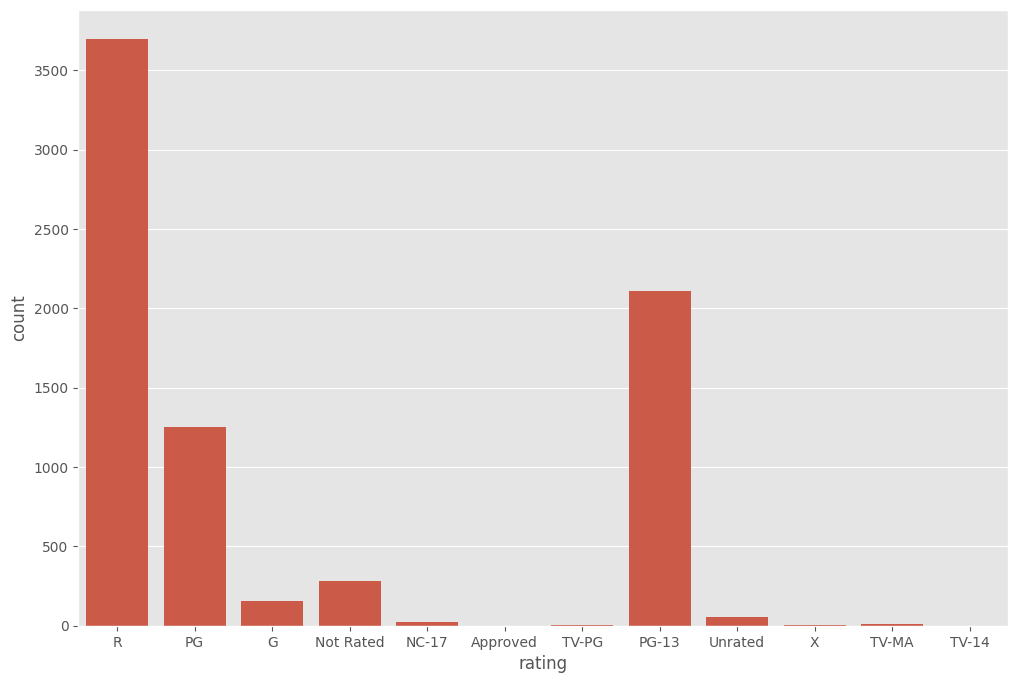

           genre      Ratio
genre                      
Comedy      2245  29.277517
Action      1705  22.235263
Drama       1518  19.796557
Crime        551   7.185707
Biography    443   5.777256
Adventure    427   5.568597
Animation    338   4.407929
Horror       322   4.199270
Fantasy       44   0.573813
Mystery       20   0.260824
Thriller      16   0.208659
Family        11   0.143453
Sci-Fi        10   0.130412
Romance       10   0.130412
Western        3   0.039124
Musical        2   0.026082
Music          1   0.013041
History        1   0.013041
Sport          1   0.013041
*******************************


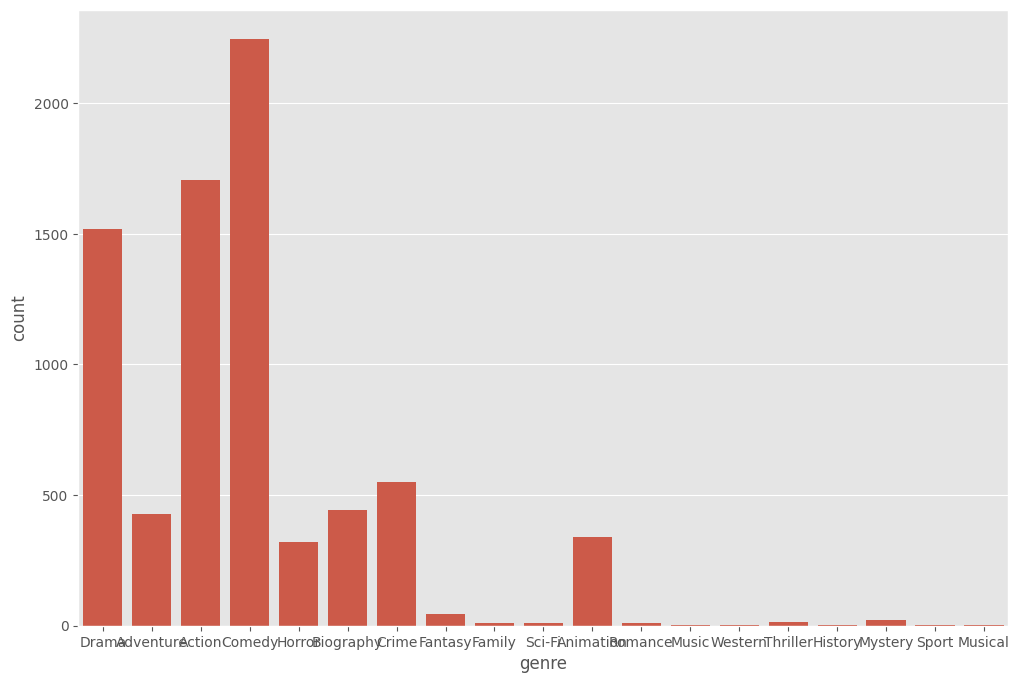

                                country      Ratio
country                                           
United States                      5475  71.400626
United Kingdom                      816  10.641628
France                              279   3.638498
Canada                              190   2.477830
Germany                             117   1.525822
Australia                            92   1.199791
Japan                                81   1.056338
India                                62   0.808555
Italy                                61   0.795514
Spain                                47   0.612937
Hong Kong                            45   0.586854
Ireland                              43   0.560772
China                                40   0.521648
South Korea                          35   0.456442
Denmark                              32   0.417319
Sweden                               25   0.326030
New Zealand                          25   0.326030
Mexico                         

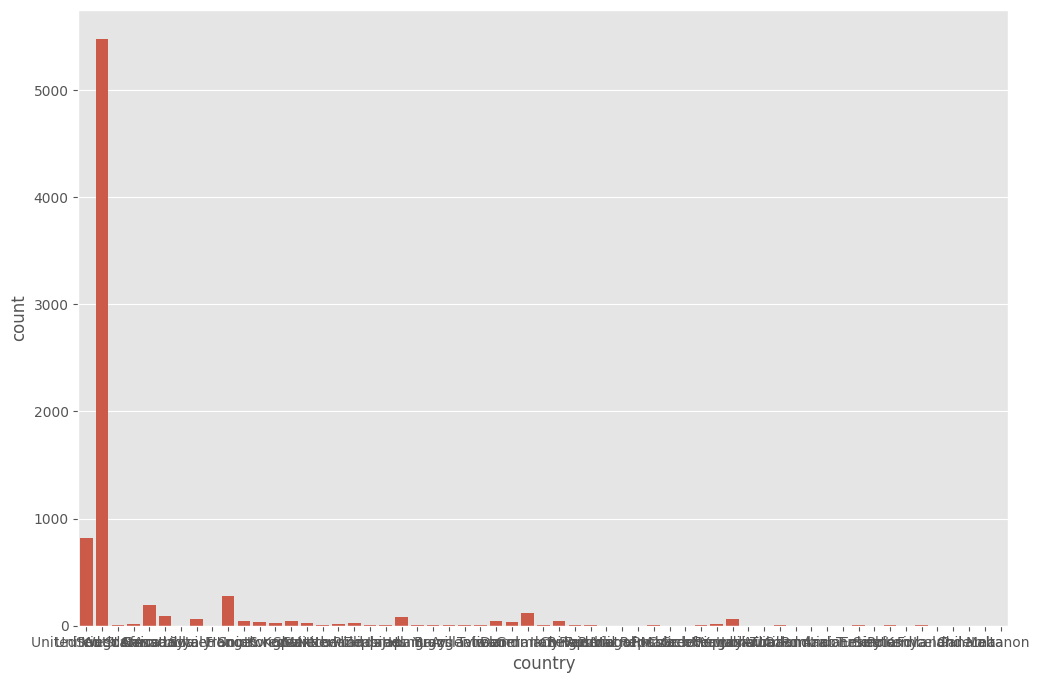

                                                    company     Ratio
company                                                              
Universal Pictures                                      377  4.916536
Warner Bros.                                            334  4.355764
Columbia Pictures                                       332  4.329682
Paramount Pictures                                      320  4.173187
Twentieth Century Fox                                   240  3.129890
New Line Cinema                                         174  2.269171
Touchstone Pictures                                     132  1.721440
Metro-Goldwyn-Mayer (MGM)                               125  1.630151
Walt Disney Pictures                                    123  1.604069
TriStar Pictures                                         94  1.225874
Dreamworks Pictures                                      76  0.991132
Miramax                                                  74  0.965050
Fox 2000 Pictures   

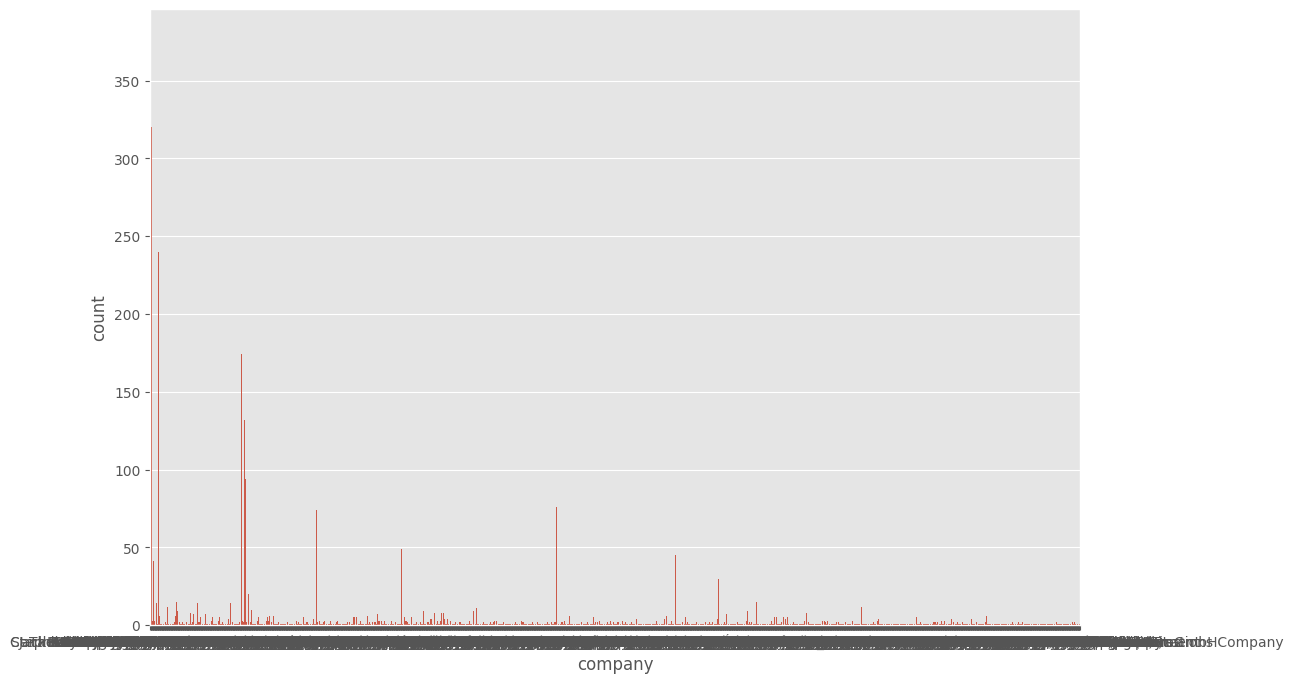

      year     Ratio
year                
2000   200  2.608242
2009   200  2.608242
2002   200  2.608242
2003   200  2.608242
2004   200  2.608242
2005   200  2.608242
2006   200  2.608242
2007   200  2.608242
2008   200  2.608242
2010   200  2.608242
2019   200  2.608242
2011   200  2.608242
2012   200  2.608242
2013   200  2.608242
2014   200  2.608242
2015   200  2.608242
2016   200  2.608242
2017   200  2.608242
2001   200  2.608242
1999   200  2.608242
1990   200  2.608242
1991   200  2.608242
1985   200  2.608242
1986   200  2.608242
1987   200  2.608242
1988   200  2.608242
1989   200  2.608242
1998   200  2.608242
2018   200  2.608242
1992   200  2.608242
1993   200  2.608242
1994   200  2.608242
1995   200  2.608242
1996   200  2.608242
1997   200  2.608242
1984   168  2.190923
1983   144  1.877934
1982   126  1.643192
1981   113  1.473657
1980    92  1.199791
2020    25  0.326030
*******************************


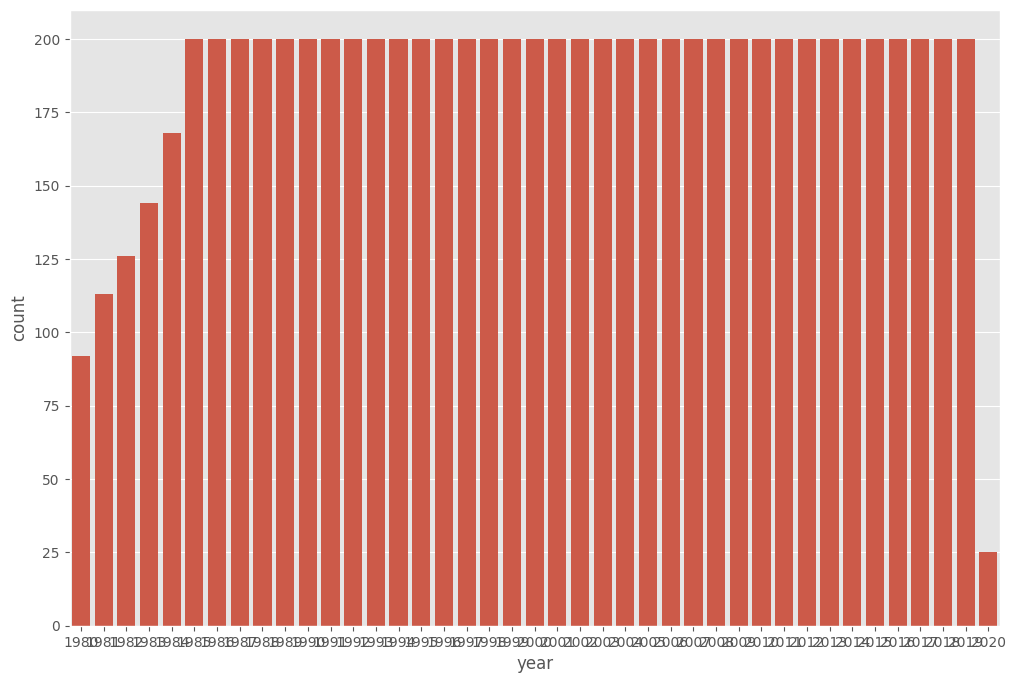

In [ ]:
#Analyzing categorical Values
for col in cat_cols:
  cat_summary(df,col_name=col,plot=True)

********
count    7665.000000
mean        6.390411
std         0.968842
min         1.900000
5%          4.700000
10%         5.200000
20%         5.600000
30%         6.000000
40%         6.200000
50%         6.500000
60%         6.700000
70%         6.900000
80%         7.200000
90%         7.600000
99%         8.300000
max         9.300000
Name: score, dtype: float64


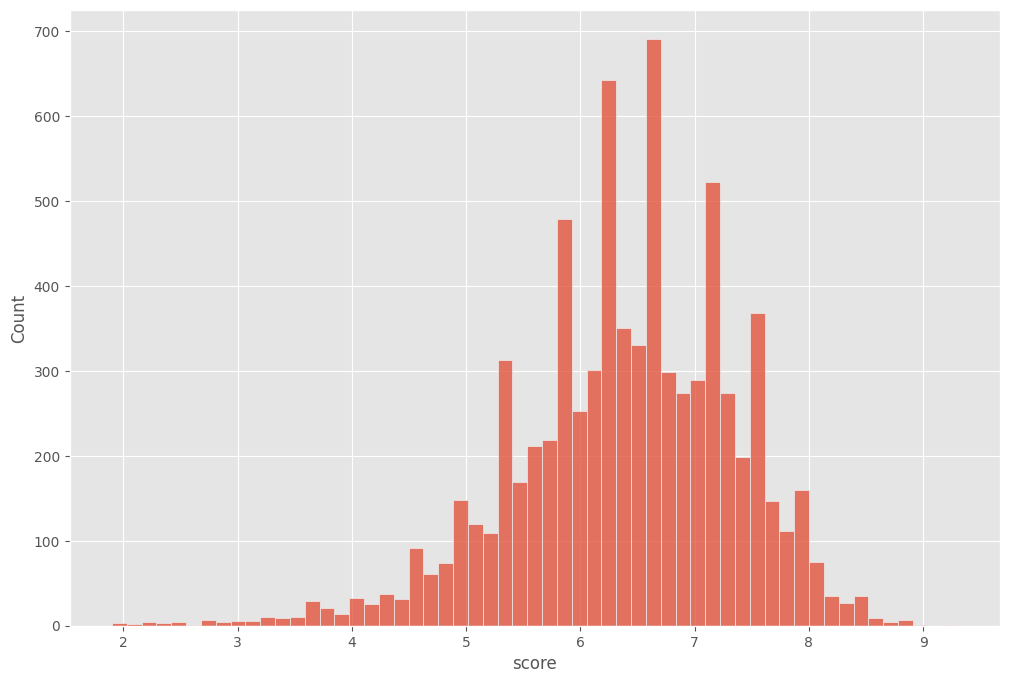

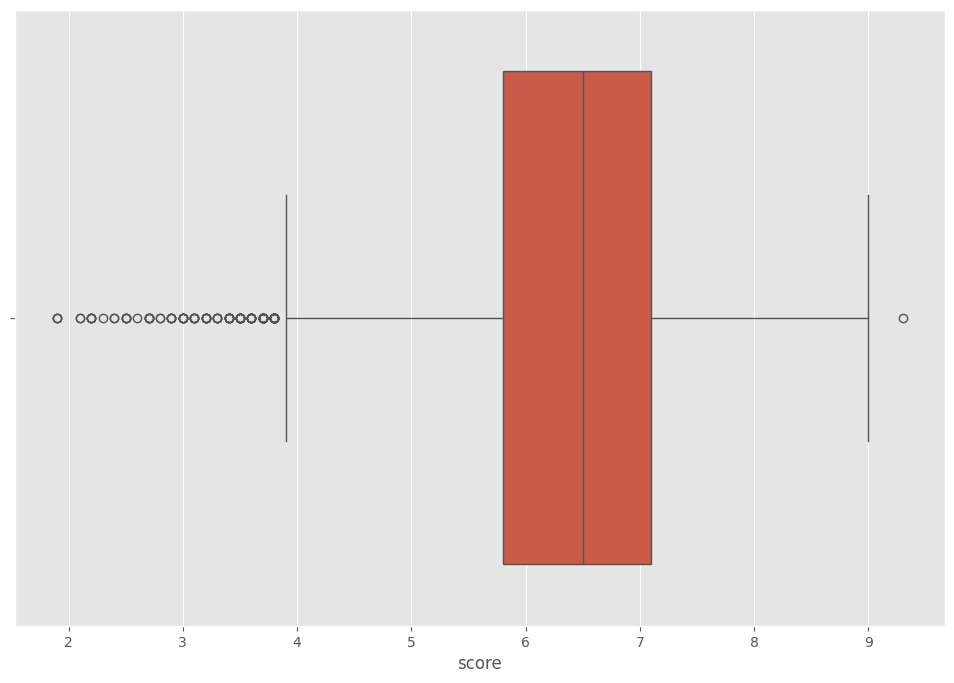

********
count    7.665000e+03
mean     8.810850e+04
std      1.633238e+05
min      7.000000e+00
5%       1.400000e+03
10%      2.800000e+03
20%      6.600000e+03
30%      1.200000e+04
40%      2.100000e+04
50%      3.300000e+04
60%      4.900000e+04
70%      7.500000e+04
80%      1.180000e+05
90%      2.260000e+05
99%      7.833600e+05
max      2.400000e+06
Name: votes, dtype: float64


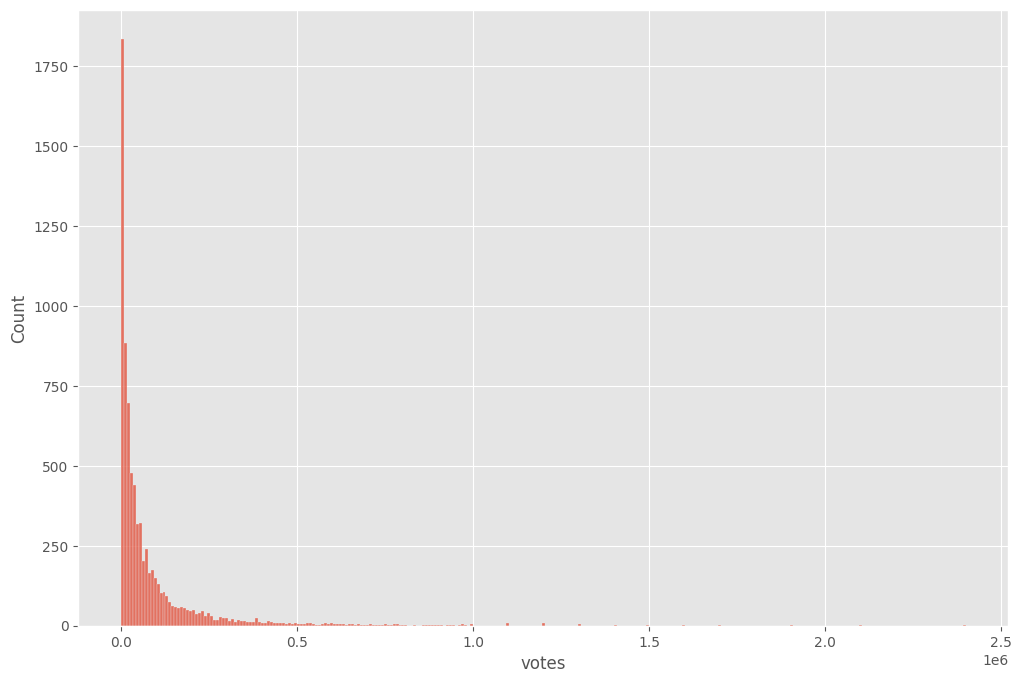

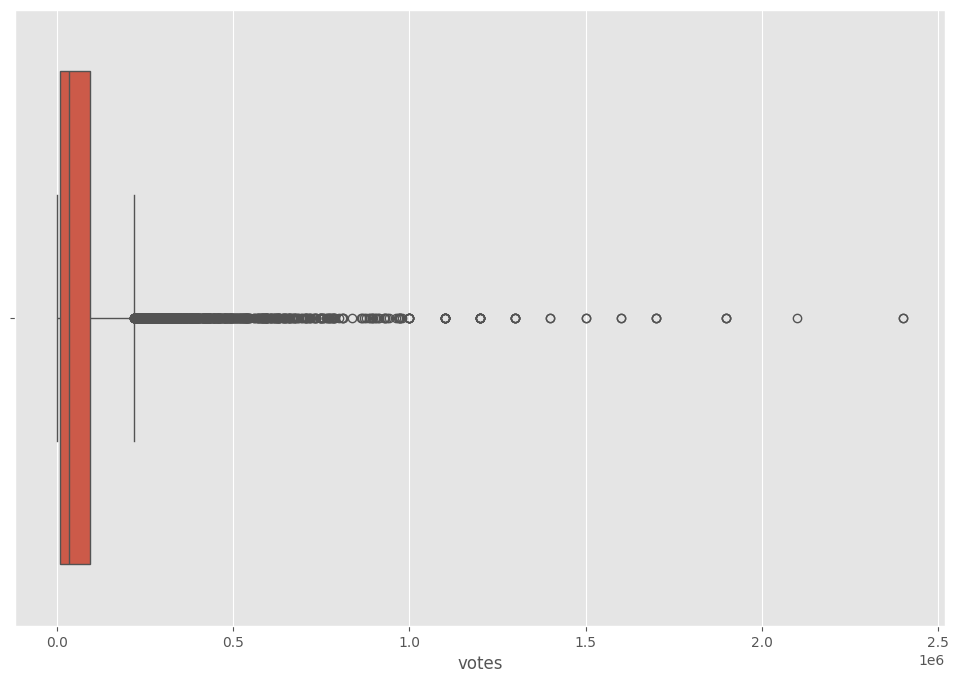

********
count    5.497000e+03
mean     3.558988e+07
std      4.145730e+07
min      3.000000e+03
5%       2.000000e+06
10%      4.000000e+06
20%      8.000000e+06
30%      1.200000e+07
40%      1.600000e+07
50%      2.050000e+07
60%      2.800000e+07
70%      3.800000e+07
80%      5.380000e+07
90%      8.500000e+07
99%      2.000000e+08
max      3.560000e+08
Name: budget, dtype: float64


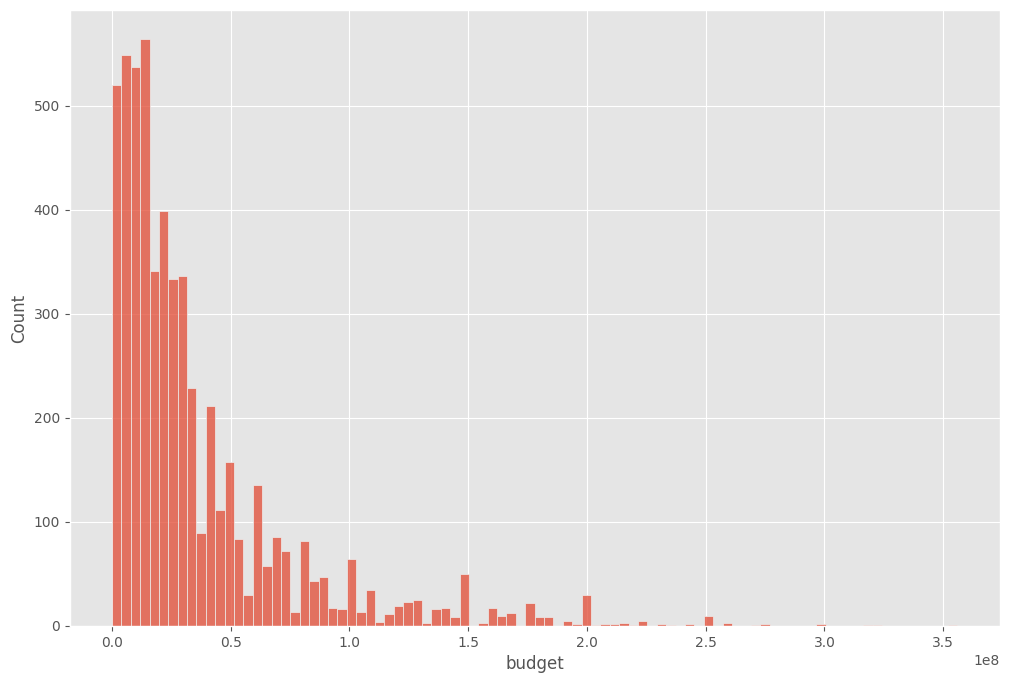

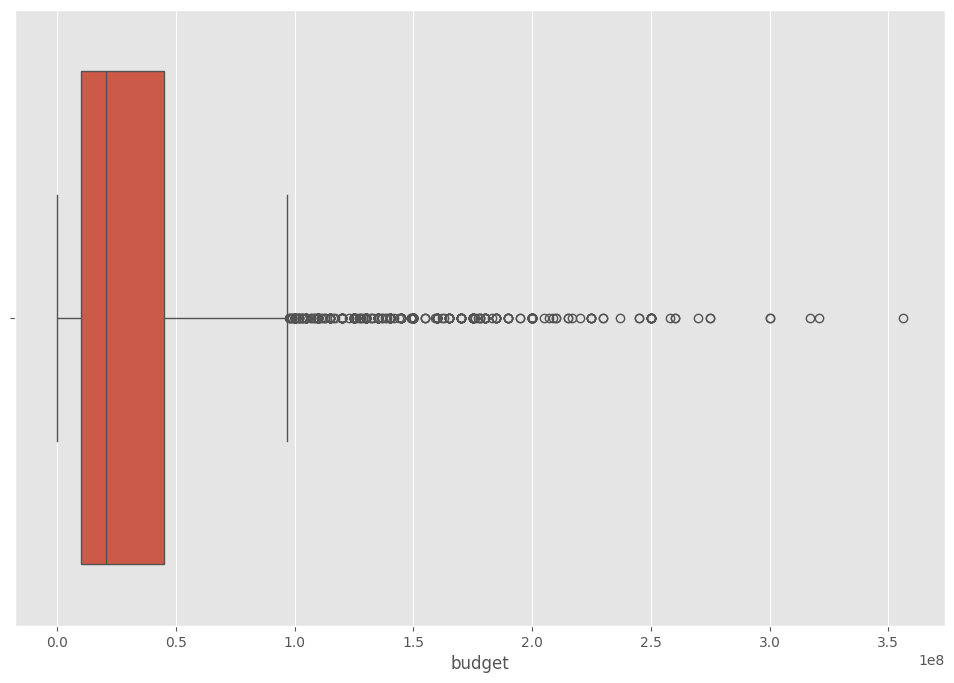

********
count    7.479000e+03
mean     7.850054e+07
std      1.657251e+08
min      3.090000e+02
5%       2.677402e+05
10%      8.667822e+05
20%      2.874398e+06
30%      6.566533e+06
40%      1.214382e+07
50%      2.020576e+07
60%      3.361124e+07
70%      5.694555e+07
80%      1.018482e+08
90%      2.090678e+08
99%      8.566930e+08
max      2.847246e+09
Name: gross, dtype: float64


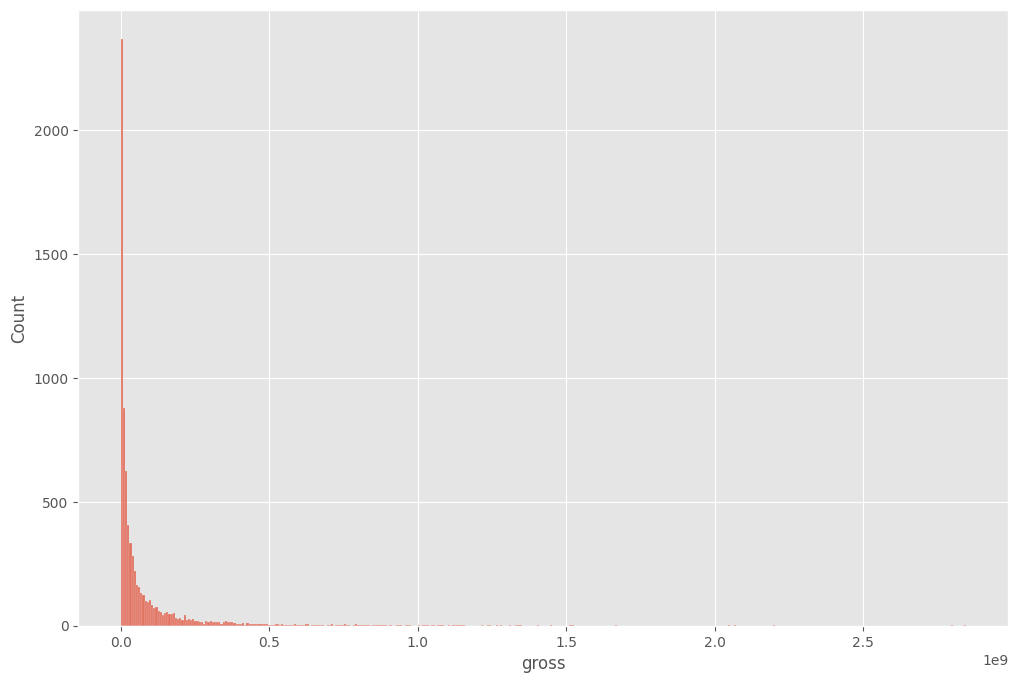

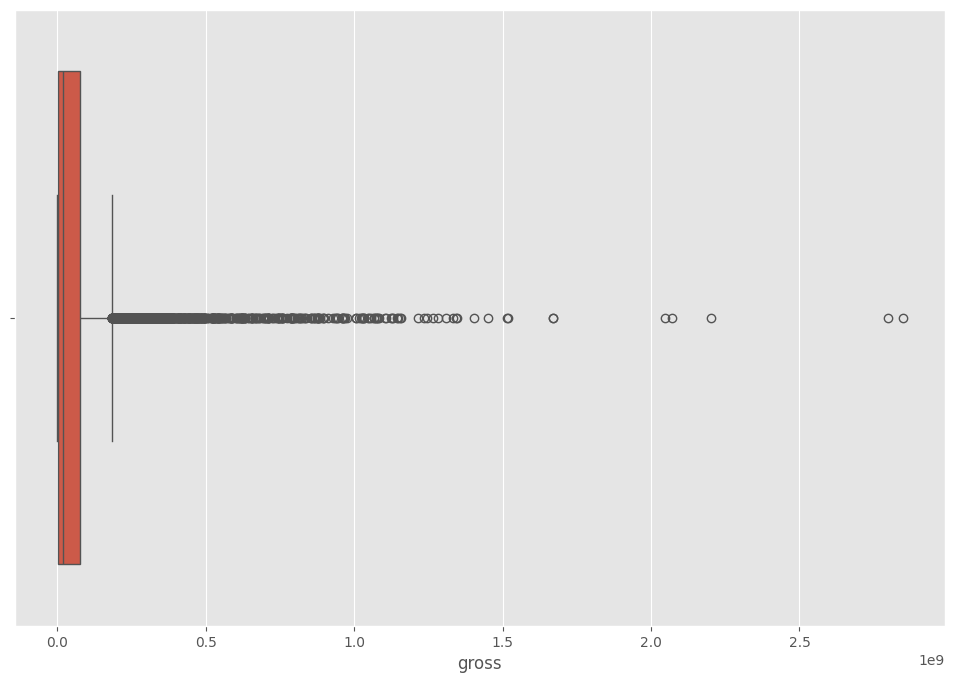

********
count    7664.000000
mean      107.261613
std        18.581247
min        55.000000
5%         85.000000
10%        89.000000
20%        93.000000
30%        97.000000
40%       100.000000
50%       104.000000
60%       108.000000
70%       113.000000
80%       119.000000
90%       130.000000
99%       169.000000
max       366.000000
Name: runtime, dtype: float64


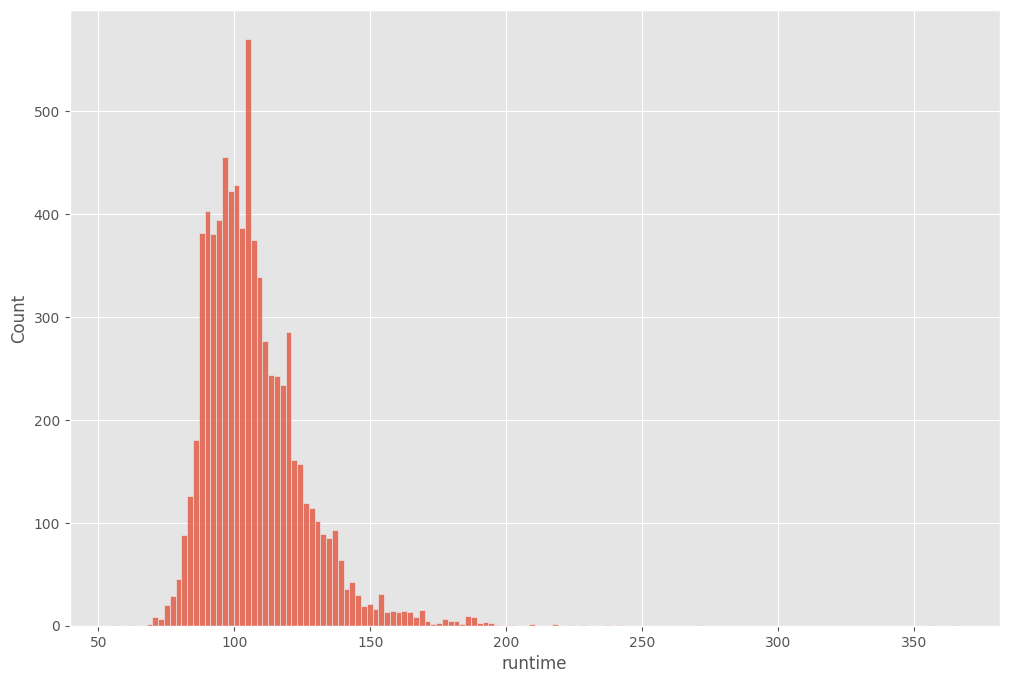

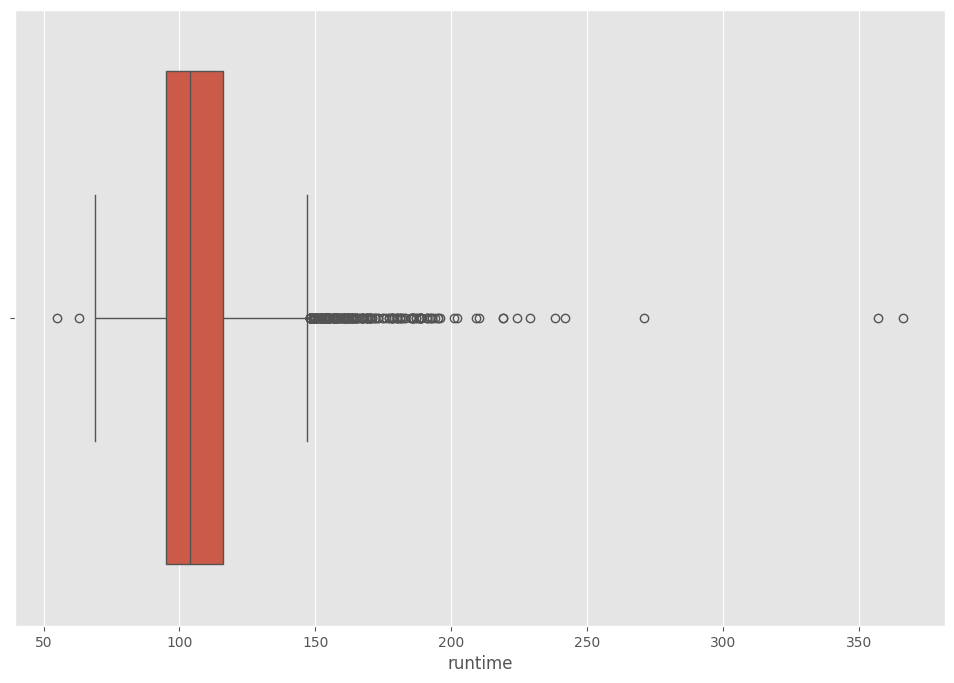

In [11]:
#Analyzing Numeric Values
for col in num_cols:
  num_summary(df,col,plot=True)


In [ ]:
#Detecting Null Values Version 1
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [ ]:
#Detecting Null Values Version 2
for col in df.columns:
  pct_missing=np.mean(df[col].isnull())
  print('{} - {}%'.format(col,pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [ ]:
#Data types for our columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [ ]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [ ]:
#Changing Budged and gross values into integer

In [12]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)

df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)

In [ ]:
#To compare year and released coloumns in terms of date
date=[]
for col in df["released"].astype(str):
  new_col=col.strip(")").split("(")
  if len(new_col) ==2:
    date.append(new_col[0])
  else:
    date.append(new_col)

#df["Date"]=pd.Series(data=date)

In [ ]:

year_source=[]
for i in range(len(df["year"])):
  a="".join(df["year"][i].astype(str))
  year_source.append(a)



In [ ]:
year_corr=[]
for i in range(len(df["year"])):
  b=date[i][-5:-1]
  year_corr.append(b)

In [ ]:
for i in year_source:
  if i not in year_corr:
    print(i)

In [ ]:
#According to result we can say that year value is the same with released date value

In [ ]:
# try vice versa
for i in year_corr:
  if i not in year_source:
    print(i)

[]
[]


In [ ]:
#According to result, we can say that there is a null in "released" column.

In [ ]:
df[df["released"].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,0,0,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,0,0,NaN,NaN


In [ ]:
#According to this result we should check released column

In [ ]:
df[df["released"].isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,0,0,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,0,0,NaN,NaN


In [ ]:
#And i fill null values in released column with values in "year" column.
df.loc[[5728,5730],"released"]=df.loc[[5728,5730],"year"]

In [ ]:
#We should somehow note and report that.

In [40]:
#To check values from max to min
df.sort_values(by=["gross"],inplace=False,ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


In [13]:
pd.set_option("display.max_rows",None)

In [ ]:
#checking duplicates

In [41]:
#Version 1
df["company"].drop_duplicates().sort_values(ascending=False).head()

7129                     thefyzz
5664                 micro_scope
6412    iDeal Partners Film Fund
4007                    i5 Films
6793                  i am OTHER
Name: company, dtype: object

In [42]:
#Version 2
df["company"].value_counts().head()

company
Universal Pictures       377
Warner Bros.             334
Columbia Pictures        332
Paramount Pictures       320
Twentieth Century Fox    240
Name: count, dtype: int64

In [43]:
df.drop_duplicates().head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


<Axes: xlabel='gross', ylabel='budget'>

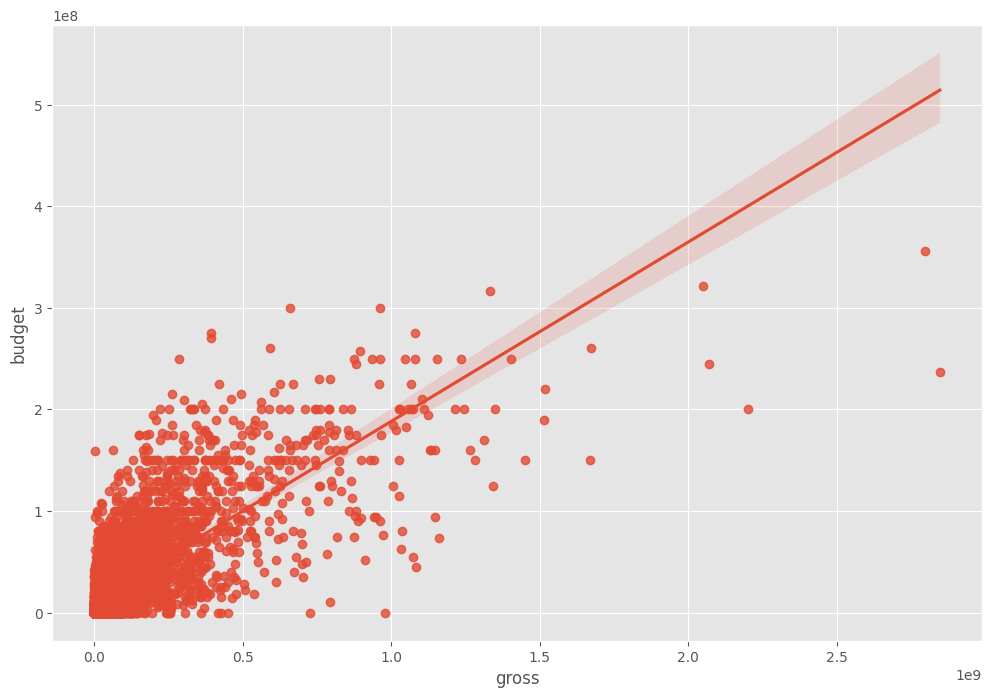

In [ ]:
#Assume that there is a strong correlation between gross and budget so i try to prove my idea
sns.regplot(x="gross",y="budget",data=df)

<Axes: xlabel='score', ylabel='gross'>

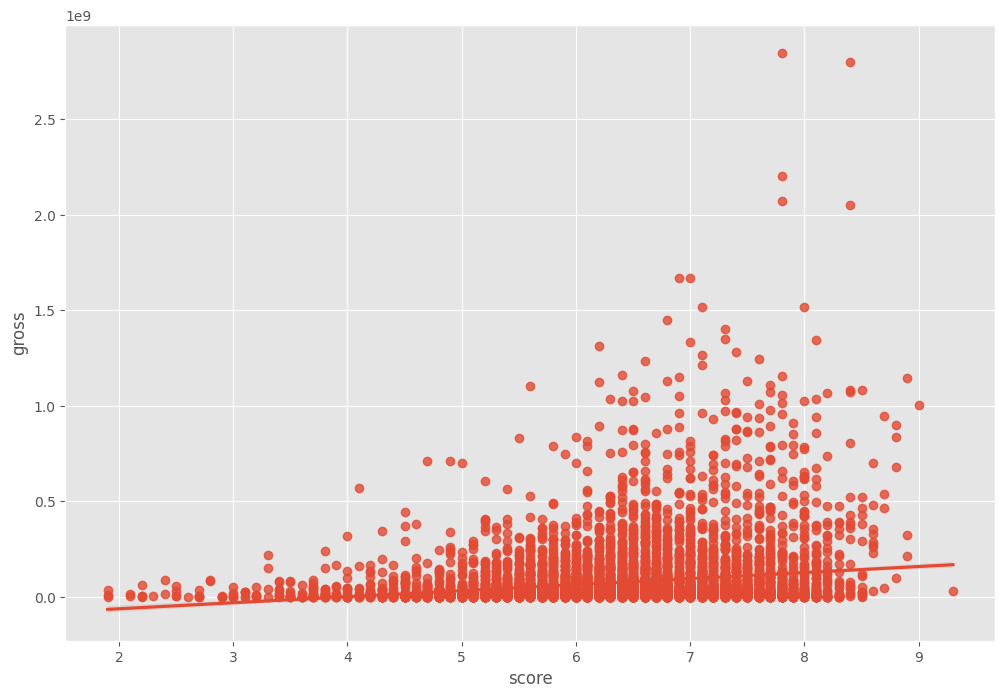

In [ ]:
sns.regplot(x="score",y="gross",data=df)

In [ ]:
#To decide which correlation method, i make some tests on data


from scipy.stats import shapiro

In [ ]:
for i in num_cols:
  statistic,p_value=shapiro(df[i])
  print(f"{i}:","Test statstic=%.4f,p_value=%.4f" % (statistic,p_value))



score: Test statstic=nan,p_value=1.0000
votes: Test statstic=nan,p_value=1.0000
budget: Test statstic=0.6746,p_value=0.0000
gross: Test statstic=0.4761,p_value=0.0000
runtime: Test statstic=nan,p_value=1.0000


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:

from scipy.stats import jarque_bera

In [ ]:
for col in num_cols:
  statistic,result=jarque_bera(df[col])
  print(f"{col}:","Test statstic=%.4f,p_value=%.4f" % (statistic,p_value))


score: Test statstic=nan,p_value=1.0000
votes: Test statstic=nan,p_value=1.0000
budget: Test statstic=39737.9806,p_value=1.0000
gross: Test statstic=724961.3956,p_value=1.0000
runtime: Test statstic=nan,p_value=1.0000


In [ ]:
#According to results i choose KendallTau method

In [ ]:
df[num_cols].corr(method="kendall")

,score,votes,budget,gross,runtime
score,1.000000,0.300115,-0.005194,0.090626,0.283611
votes,0.300115,1.000000,0.439902,0.560118,0.198240
budget,-0.005194,0.439902,1.000000,0.541956,0.176016
gross,0.090626,0.560118,0.541956,1.000000,0.176912
runtime,0.283611,0.198240,0.176016,0.176912,1.000000


<Axes: title={'center': 'Correlation matrix for Numeric Features'}>

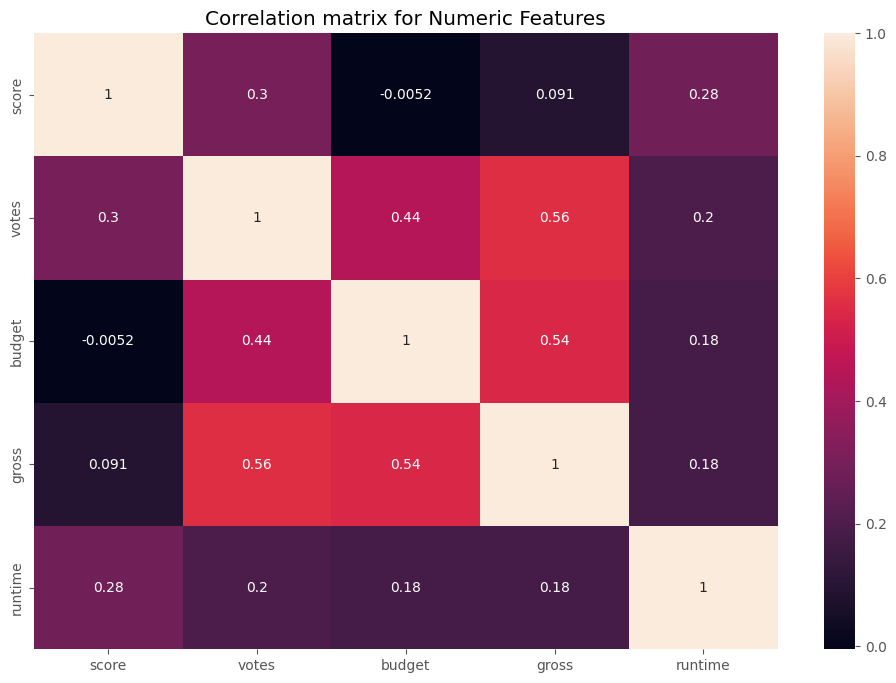

In [ ]:
correlation_matrix=df[num_cols].corr(method="kendall")

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

sns.heatmap(correlation_matrix,annot=True)


In [ ]:
correlation_matrix.unstack()

score    score      1.000000
         votes      0.300115
         budget    -0.005194
         gross      0.090626
         runtime    0.283611
votes    score      0.300115
         votes      1.000000
         budget     0.439902
         gross      0.560118
         runtime    0.198240
budget   score     -0.005194
         votes      0.439902
         budget     1.000000
         gross      0.541956
         runtime    0.176016
gross    score      0.090626
         votes      0.560118
         budget     0.541956
         gross      1.000000
         runtime    0.176912
runtime  score      0.283611
         votes      0.198240
         budget     0.176016
         gross      0.176912
         runtime    1.000000
dtype: float64

In [14]:
#According to this map, we can say that correlation rate between gross and votes and gross and budget is higher than other pair of values. But normally they can be classified as middle rated correlation level.
#Correlation between budget and gross is not strong as i claimed earlier.

In [ ]:
#We try to create correlation for categoric_variables


In [ ]:
df[cat_cols].nunique()

rating       12
genre        19
country      59
company    2385
year         41
dtype: int64

In [ ]:
for i in df[cat_cols]:
  df[i]=df[i].astype("category")

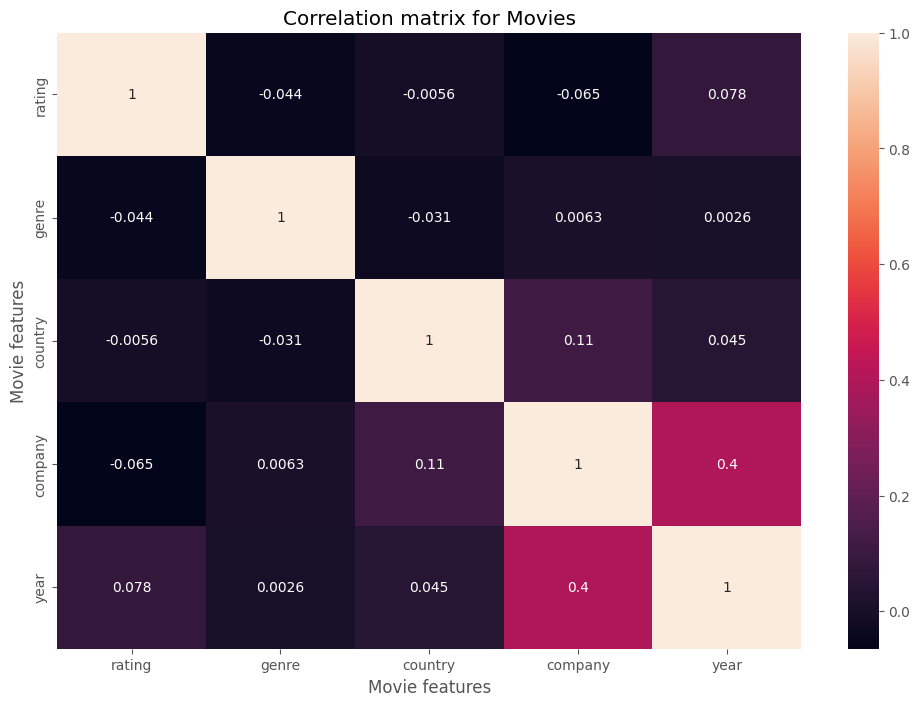

In [16]:
#To calculate correlation, i take some steps to convert categorical data into numerical value
correlation_matrix = df[cat_cols].apply(lambda x: x.factorize()[0]).corr(method='kendall')
sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [ ]:
df["name"].head()

0                                       The Shining
1                                   The Blue Lagoon
2    Star Wars: Episode V - The Empire Strikes Back
3                                         Airplane!
4                                        Caddyshack
Name: name, dtype: object

In [17]:
corr_pairs = correlation_matrix.unstack().sort_values(kind="quicksort")

print(corr_pairs
      )

rating   company   -0.064558
company  rating    -0.064558
rating   genre     -0.044261
genre    rating    -0.044261
         country   -0.030525
country  genre     -0.030525
         rating    -0.005553
rating   country   -0.005553
year     genre      0.002562
genre    year       0.002562
         company    0.006299
company  genre      0.006299
year     country    0.044810
country  year       0.044810
year     rating     0.078171
rating   year       0.078171
company  country    0.113388
country  company    0.113388
year     company    0.400767
company  year       0.400767
rating   rating     1.000000
country  country    1.000000
genre    genre      1.000000
company  company    1.000000
year     year       1.000000
dtype: float64


In [46]:
# We can now take a look at the ones that have a high correlation (> 0.5)

strong_pairs = corr_pairs[abs(corr_pairs) > 0.5 ]

print(strong_pairs.head())

rating   rating     1.0
country  country    1.0
genre    genre      1.0
company  company    1.0
year     year       1.0
dtype: float64


In [ ]:
# Looking at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64')

CompanyGrossSumSorted.head()

company
Warner Bros.             56491421806
Universal Pictures       52514188890
Columbia Pictures        43008941346
Paramount Pictures       40493607415
Twentieth Century Fox    40257053857
Name: gross, dtype: int64

In [47]:
df.groupby(['company', 'year'])[["gross"]].sum().head()

gross
company                         year       
"DIA" Productions GmbH & Co. KG 1980      0
                                1981      0
                                1982      0
                                1983      0
                                1984      0

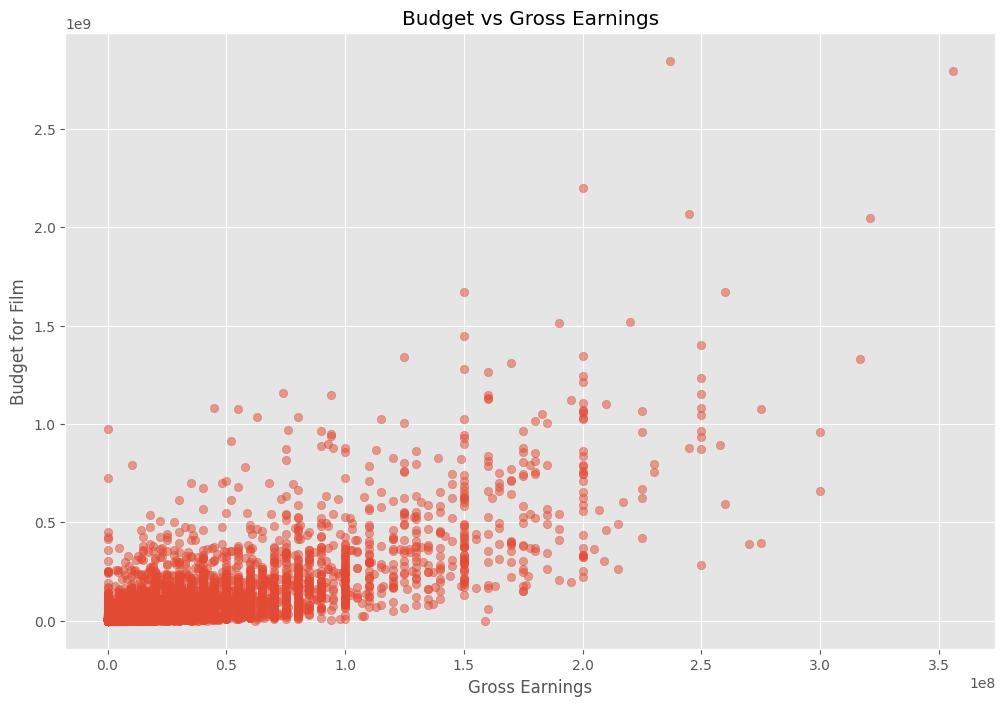

In [ ]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

In [13]:
df[cat_cols].head()

,rating,genre,country,company,year
0,R,Drama,United Kingdom,Warner Bros.,1980
1,R,Adventure,United States,Columbia Pictures,1980
2,PG,Action,United States,Lucasfilm,1980
3,PG,Comedy,United States,Paramount Pictures,1980
4,R,Comedy,United States,Orion Pictures,1980


In [ ]:
df2=df.copy()

In [ ]:
from sklearn.feature_extraction import FeatureHasher
h = FeatureHasher(n_features=10)
D = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]
f = h.transform(D)
f.toarray()

In [15]:
for col in cat_cols:
  df_hot=pd.get_dummies(df,columns=[col],prefix="_",dtype=int)

# One Hot Encoding For Correlation

In [16]:
#Drop cardinal values for correlation
df_hot.drop(columns=cat_but_car,inplace=True)

In [17]:
df_hot.head()

,rating,genre,score,votes,country,budget,gross,company,runtime,__1980,...,__2011,__2012,__2013,__2014,__2015,__2016,__2017,__2018,__2019,__2020
0,R,Drama,8.4,927000.0,United Kingdom,19000000,46998772,Warner Bros.,146.0,1,...,0,0,0,0,0,0,0,0,0,0
1,R,Adventure,5.8,65000.0,United States,4500000,58853106,Columbia Pictures,104.0,1,...,0,0,0,0,0,0,0,0,0,0
2,PG,Action,8.7,1200000.0,United States,18000000,538375067,Lucasfilm,124.0,1,...,0,0,0,0,0,0,0,0,0,0
3,PG,Comedy,7.7,221000.0,United States,3500000,83453539,Paramount Pictures,88.0,1,...,0,0,0,0,0,0,0,0,0,0
4,R,Comedy,7.3,108000.0,United States,6000000,39846344,Orion Pictures,98.0,1,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_hot.drop(columns=["rating","genre","country","company"],inplace=True)

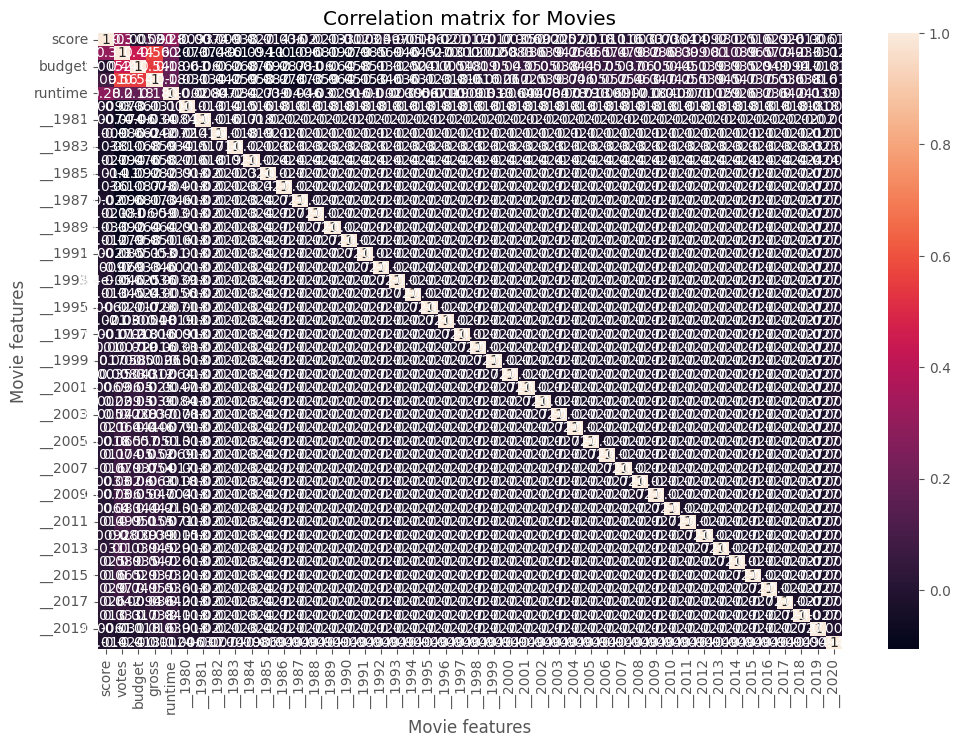

In [19]:
correlation_matrix=df_hot.corr(method="kendall")
sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

#There are lots of value thats why we can not observe anything meaningfull

In [ ]:
#So i decided to compare with pairs

In [19]:
df["year"]=df["year"].astype("category")

In [133]:
#1.I decide to find relationship between genre and gross
X=df.groupby(["genre"]).agg({"gross":"sum"})
gross_list=np.array(X)
genre=list(X.index)
gross_list=pd.DataFrame(gross_list)
genre_list=pd.DataFrame(data=genre)


In [139]:
genre_gross=pd.concat([gross_list,genre_list],axis=1)

In [140]:
genre_gross.columns=["gross","genre"]

In [143]:
genre_gross.shape

(19, 2)

Text(0, 0.5, 'Gross Millions')

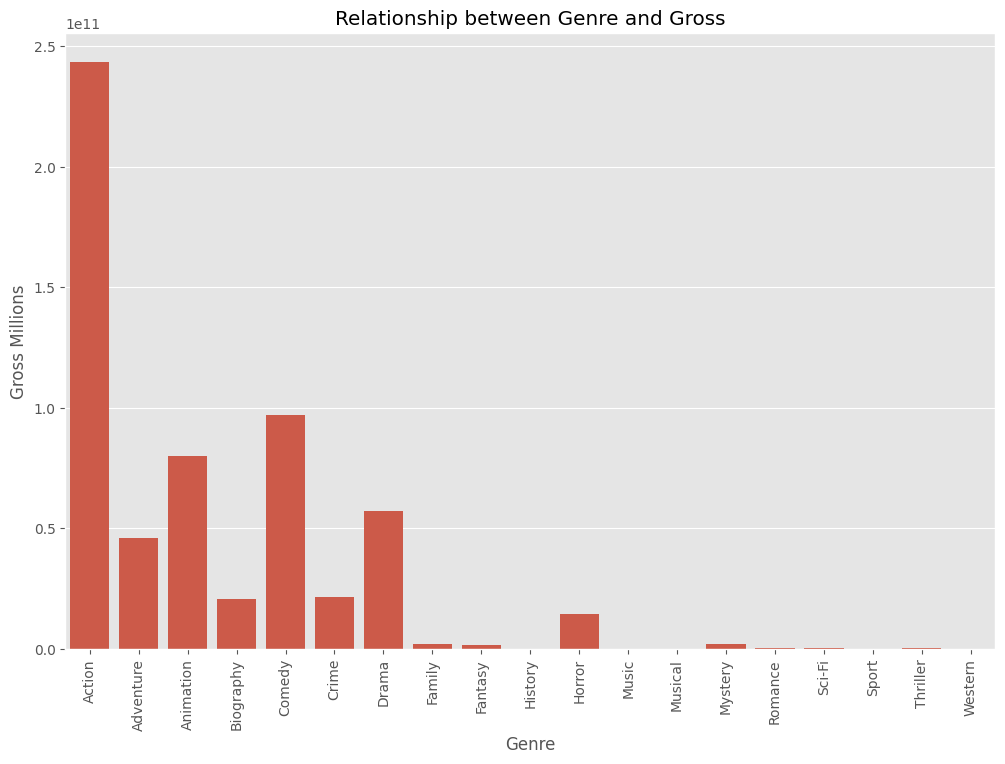

In [145]:
sns.barplot(data=genre_gross,x="genre",y="gross")
plt.xticks(rotation=90)
plt.title("Relationship between Genre and Gross")

plt.xlabel("Genre")

plt.ylabel("Gross Millions")

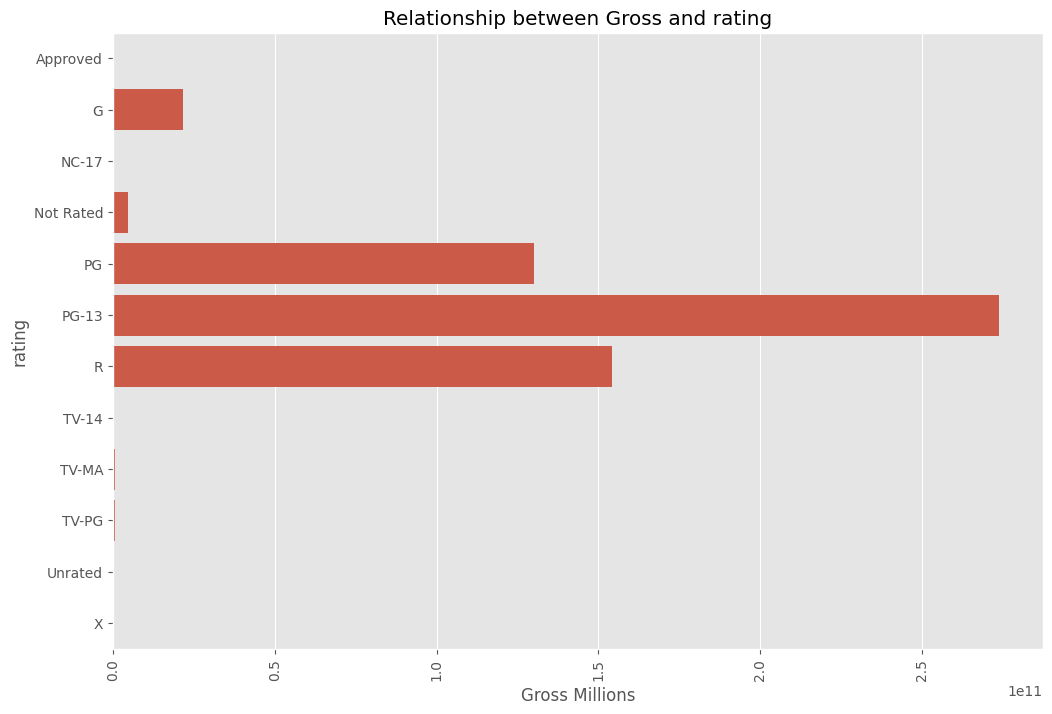

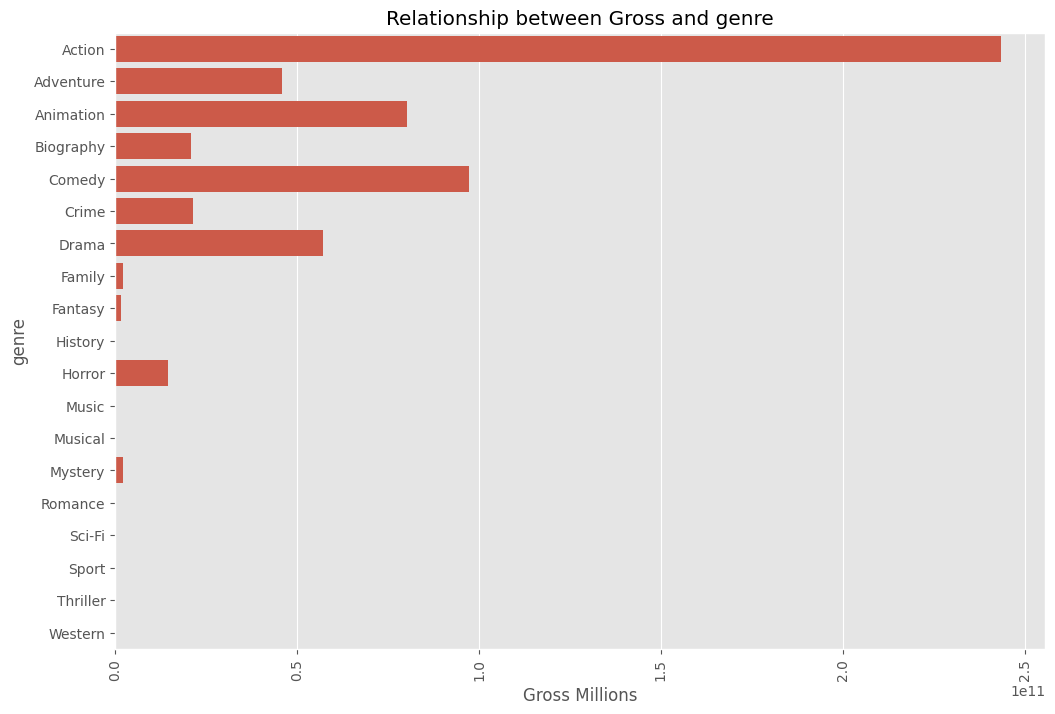

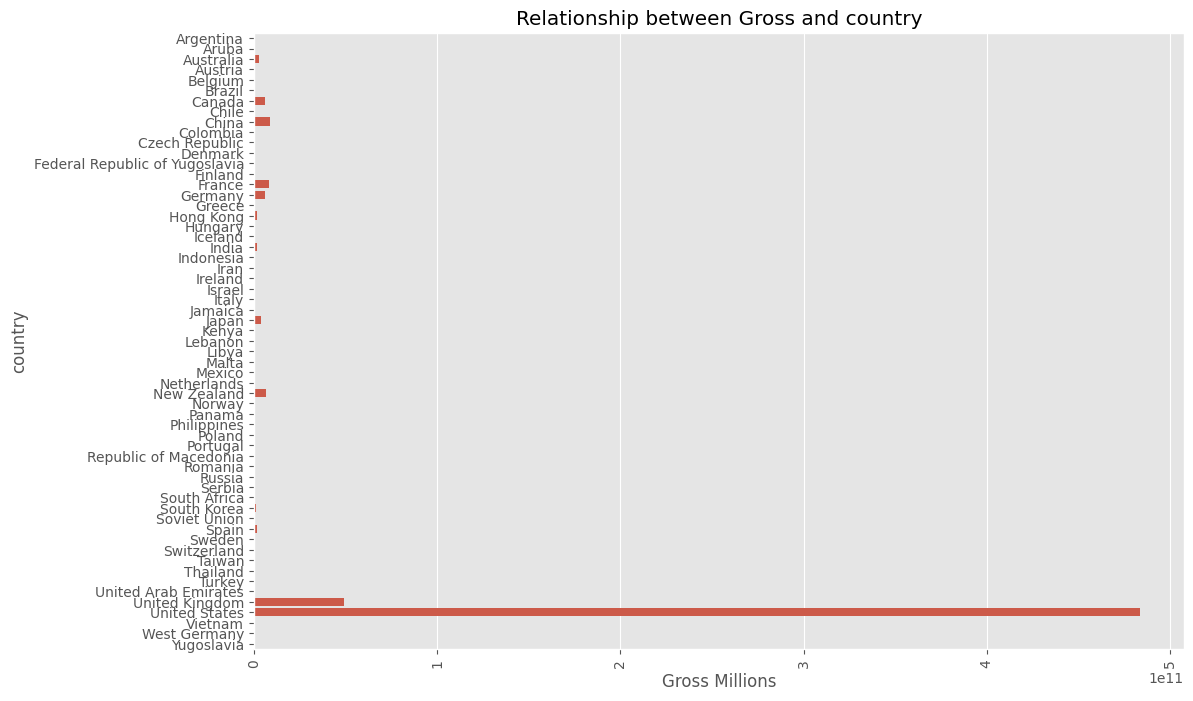

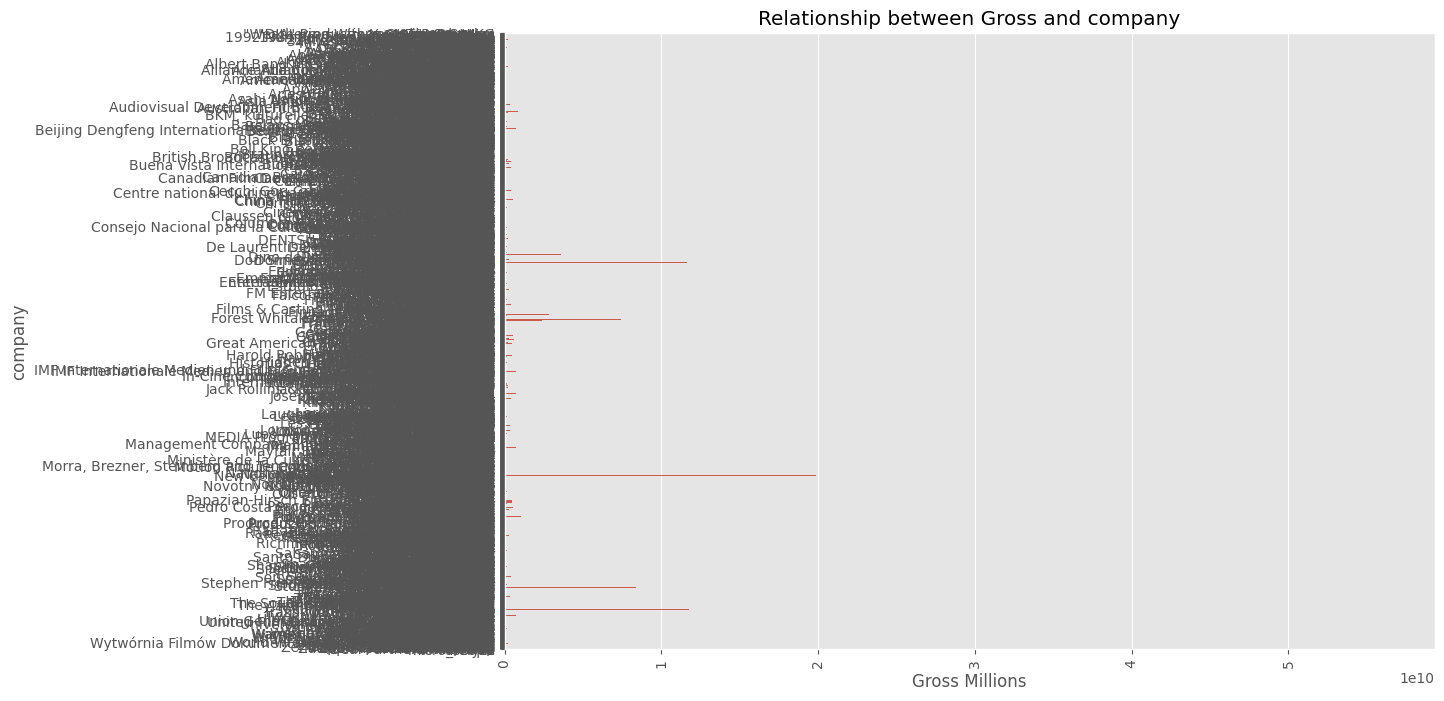

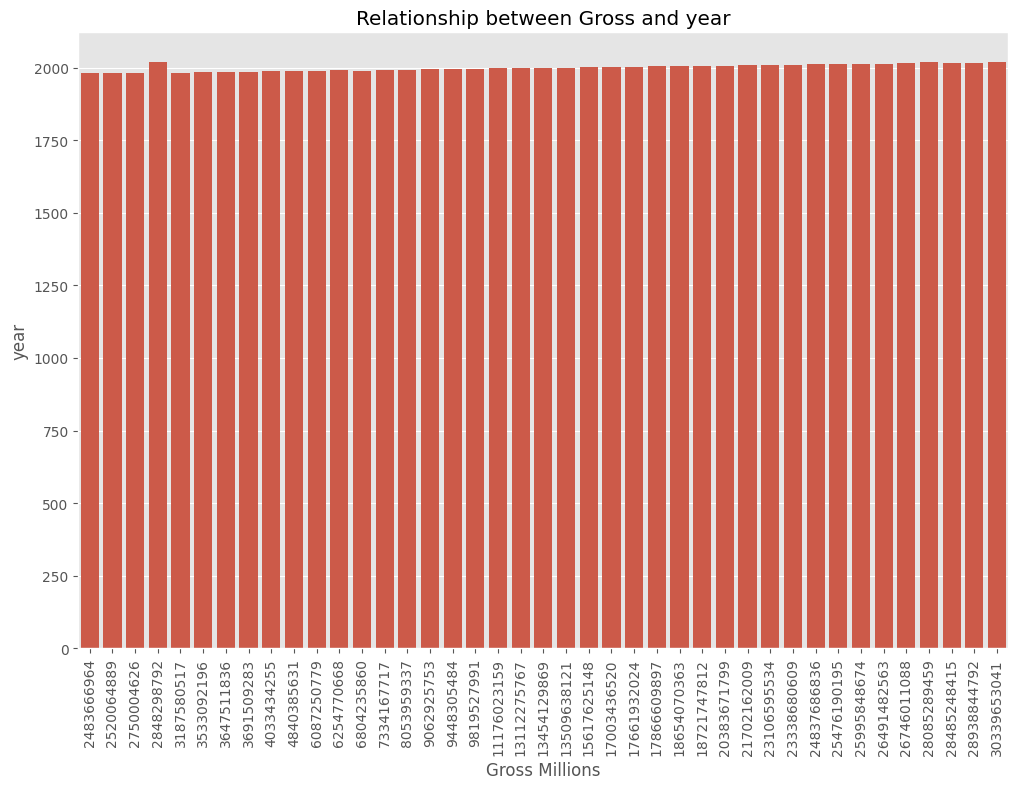

In [20]:
#So i automate this process

for col in cat_cols:
  X=df.groupby(col).agg({"gross":"sum"})
  gross_list=np.array(X)
  category=list(X.index)

  gross_list=pd.DataFrame(gross_list)
  category=pd.DataFrame(category)
  genre_category=pd.concat([gross_list,category],axis=1)
  genre_category.columns=[col,"gross"]

  sns.barplot(data=genre_category,x=col,y="gross")
  plt.xticks(rotation=90)
  plt.title(f"Relationship between Gross and {col}")
  plt.xlabel("Gross Millions")
  plt.ylabel(col)
  plt.show()

# Chi Square Testing of Categorical Values

In [21]:
import os as os
import pandas as pd
from itertools import product
import numpy as np
import scipy.stats as ss
df_cat_v1 = df[cat_cols].dropna()

In [22]:
df_cat_v1.columns

Index(['rating', 'genre', 'country', 'company', 'year'], dtype='object')

In [23]:
cat_var1 = ('rating', 'genre', 'country', 'company', 'year')
cat_var2 = ('rating', 'genre', 'country', 'company', 'year')

In [24]:
cat_var_prod = list(product(cat_var1,cat_var2, repeat = 1))

In [26]:
# combination with product method
cat_var_prod

[('rating', 'rating'),
 ('rating', 'genre'),
 ('rating', 'country'),
 ('rating', 'company'),
 ('rating', 'year'),
 ('genre', 'rating'),
 ('genre', 'genre'),
 ('genre', 'country'),
 ('genre', 'company'),
 ('genre', 'year'),
 ('country', 'rating'),
 ('country', 'genre'),
 ('country', 'country'),
 ('country', 'company'),
 ('country', 'year'),
 ('company', 'rating'),
 ('company', 'genre'),
 ('company', 'country'),
 ('company', 'company'),
 ('company', 'year'),
 ('year', 'rating'),
 ('year', 'genre'),
 ('year', 'country'),
 ('year', 'company'),
 ('year', 'year')]

In [27]:
#Chi-Square test for categorical values

result = []
for i in cat_var_prod:
  if i[0] != i[1]:
    result.append((i[0],i[1],list(ss.chi2_contingency(pd.crosstab(
                            df_cat_v1[i[0]], df_cat_v1[i[1]])))[1]))

In [28]:
result

[('rating', 'genre', 0.0),
 ('rating', 'country', 0.0),
 ('rating', 'company', 0.0),
 ('rating', 'year', 1.1163072875606477e-86),
 ('genre', 'rating', 0.0),
 ('genre', 'country', 3.742823813705363e-38),
 ('genre', 'company', 0.0),
 ('genre', 'year', 8.808757459698186e-21),
 ('country', 'rating', 0.0),
 ('country', 'genre', 3.7428238137053597e-38),
 ('country', 'company', 0.0),
 ('country', 'year', 4.733372602995786e-17),
 ('company', 'rating', 0.0),
 ('company', 'genre', 0.0),
 ('company', 'country', 0.0),
 ('company', 'year', 9.999488168523533e-147),
 ('year', 'rating', 1.1163072875606477e-86),
 ('year', 'genre', 8.808757459700185e-21),
 ('year', 'country', 4.733372602995786e-17),
 ('year', 'company', 9.999488168531499e-147)]

In [29]:
chi_test_output = pd.DataFrame(result, columns = ["var1", "var2",
                                                       "coeff"])

In [ ]:
#According to result, we can see that there is no dependicies between rating-year,genre-country,genre-year,country-genre,
#,country-year